In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [7]:
X_train = np.loadtxt('data/input.csv', delimiter=',')
y_train = np.loadtxt('data/labels.csv', delimiter=',')

In [8]:
X_test = np.loadtxt('data/input_test.csv', delimiter=',')
y_test = np.loadtxt('data/labels_test.csv', delimiter=',')

In [9]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

In [10]:
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [11]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [15]:
import matplotlib.pyplot as plt

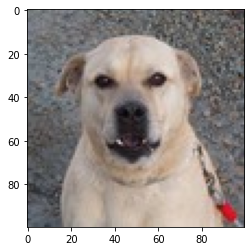

In [18]:
plt.imshow(X_train[5, :])
plt.show()

## Building Model

In [19]:
# first layers is the filters, number of filter, size of the filters, and then activation function
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# sigmoid because is a binary classification


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 26s 712ms/step - loss: 0.7099 - accuracy: 0.5215
Epoch 2/10
32/32 [==============================] - 24s 763ms/step - loss: 0.6662 - accuracy: 0.5940
Epoch 3/10
32/32 [==============================] - 22s 678ms/step - loss: 0.6022 - accuracy: 0.6865
Epoch 4/10
32/32 [==============================] - 22s 685ms/step - loss: 0.5139 - accuracy: 0.7520
Epoch 5/10
32/32 [==============================] - 22s 697ms/step - loss: 0.4312 - accuracy: 0.7985
Epoch 6/10
32/32 [==============================] - 23s 721ms/step - loss: 0.3696 - accuracy: 0.8415
Epoch 7/10
32/32 [==============================] - 17s 536ms/step - loss: 0.3024 - accuracy: 0.8695
Epoch 8/10
32/32 [==============================] - 17s 539ms/step - loss: 0.2678 - accuracy: 0.8875
Epoch 9/10
32/32 [==============================] - 17s 535ms/step - loss: 0.1899 - accuracy: 0.9325
Epoch 10/10
32/32 [==============================] - 18s 552ms/step - loss: 0.1521 - accura

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

13/13 [==============================] - 1s 73ms/step - loss: 0.9856 - accuracy: 0.6450
The accuracy for this model is  0.64


## Prediction

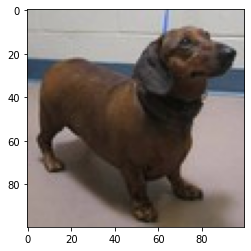

dog


In [50]:
rand_idx = np.random.randint(0, len(y_test))
plt.imshow(X_test[rand_idx, :])
plt.show()
y_pred = model.predict(X_test[rand_idx, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print(pred)